In [0]:
 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import numpy as np
import time

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
X_train = X_train/255
X_test = X_test/255

In [8]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [9]:
print("Class label of first image :", y_train[0])

Class label of first image : 5


In [11]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
print("After converting the output into a vector : ",Y_train[0])

After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

For (784 - 488 - 256 - 10) Architecture

In [21]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Dense(488, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 488)               383080    
_________________________________________________________________
batch_normalization_5 (Batch (None, 488)               1952      
_________________________________________________________________
dropout_5 (Dropout)          (None, 488)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               125184    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total para

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.4587 - acc: 0.8601 - val_loss: 0.1523 - val_acc: 0.9538
Epoch 2/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.2336 - acc: 0.9285 - val_loss: 0.1202 - val_acc: 0.9620
Epoch 3/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.1864 - acc: 0.9437 - val_loss: 0.1012 - val_acc: 0.9686
Epoch 4/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.1616 - acc: 0.9516 - val_loss: 0.0855 - val_acc: 0.9728
Epoch 5/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.1467 - acc: 0.9553 - val_loss: 0.0863 - val_acc: 0.9723
Epoch 6/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.1282 - acc: 0.9610 - val_loss: 0.0823 - val_acc: 0.9739
Epoch 7/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.1258 - acc: 0.9615 - val_loss: 0.

Test score: 0.0618182118332712
Test accuracy: 0.9819


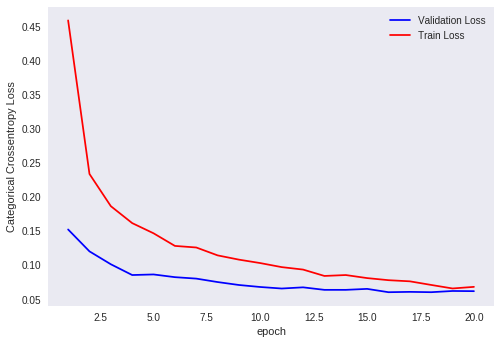

In [23]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

For (784 - 515 - 319 -  127 - 10)  3 hidden layer Architecture

In [31]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Dense(515, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(319, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(127, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 515)               404275    
_________________________________________________________________
batch_normalization_11 (Batc (None, 515)               2060      
_________________________________________________________________
dropout_11 (Dropout)         (None, 515)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 319)               164604    
_________________________________________________________________
batch_normalization_12 (Batc (None, 319)               1276      
_________________________________________________________________
dropout_12 (Dropout)         (None, 319)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 127)               40640     
__________

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.5505 - acc: 0.8335 - val_loss: 0.1642 - val_acc: 0.9487
Epoch 2/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.2447 - acc: 0.9290 - val_loss: 0.1198 - val_acc: 0.9626
Epoch 3/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.1930 - acc: 0.9433 - val_loss: 0.0975 - val_acc: 0.9711
Epoch 4/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.1625 - acc: 0.9525 - val_loss: 0.0862 - val_acc: 0.9740
Epoch 5/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.1450 - acc: 0.9571 - val_loss: 0.0858 - val_acc: 0.9740
Epoch 6/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.1307 - acc: 0.9614 - val_loss: 0.0752 - val_acc: 0.9769
Epoch 7/20
60000/60000 [==============================] - 13s 214us/step - loss: 0.1244 - acc: 0.9629 - val_loss: 0.

Test score: 0.052927311327529605
Test accuracy: 0.9858


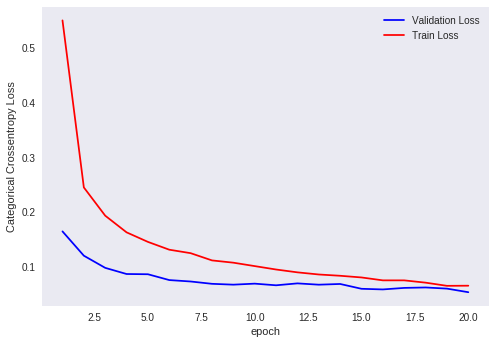

In [33]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

For (784 - 600 - 567-428-385 -250- 10)  5 hidden layer Architecture

In [34]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(567, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(428, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(385, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_14 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_14 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 567)               340767    
_________________________________________________________________
batch_normalization_15 (Batc (None, 567)               2268      
_________________________________________________________________
dropout_15 (Dropout)         (None, 567)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 428)               243104    
__________

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 29s 481us/step - loss: 0.0717 - acc: 0.9793 - val_loss: 0.0594 - val_acc: 0.9850
Epoch 2/20
60000/60000 [==============================] - 26s 436us/step - loss: 0.0706 - acc: 0.9798 - val_loss: 0.0578 - val_acc: 0.9838
Epoch 3/20
60000/60000 [==============================] - 26s 435us/step - loss: 0.0695 - acc: 0.9798 - val_loss: 0.0601 - val_acc: 0.9833
Epoch 4/20
60000/60000 [==============================] - 26s 433us/step - loss: 0.0631 - acc: 0.9816 - val_loss: 0.0557 - val_acc: 0.9848
Epoch 5/20
60000/60000 [==============================] - 26s 433us/step - loss: 0.0616 - acc: 0.9816 - val_loss: 0.0511 - val_acc: 0.9857
Epoch 6/20
60000/60000 [==============================] - 26s 434us/step - loss: 0.0603 - acc: 0.9823 - val_loss: 0.0531 - val_acc: 0.9849
Epoch 7/20
60000/60000 [==============================] - 26s 435us/step - loss: 0.0605 - acc: 0.9827 - val_loss: 0.

Test score: 0.05311666791146854
Test accuracy: 0.9861


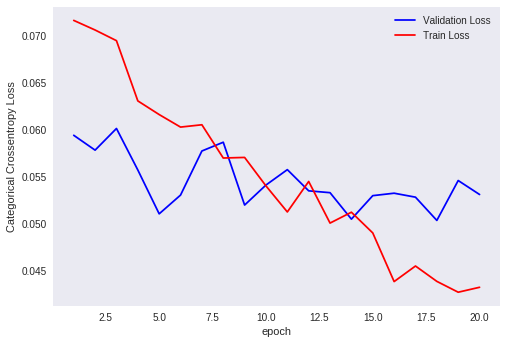

In [37]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Observation:
Accuracy increasing slightly as number of hidden layer increases.
As in graph of third architecture of number of 5 hidden layers its overtitting after 13 epochs.